## データ読み込み

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

#出力する行数を設定、省略をなくす
pd.set_option('display.max_rows', 500)

#データをまとめて読み込み、訓練データはtrain
train_files = glob.glob('./data/train/*.csv')
train = pd.DataFrame()
for file in train_files:
    train1 = pd.read_csv(file)
    cat_train = pd.concat([train,train1])
    train = cat_train

train.head()

/var/folders/ks/17djw9_d5r3300_0z8cc33sh0000gn/T/ipykernel_61699/1329853670.py:14: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  train1 = pd.read_csv(file)
/var/folders/ks/17djw9_d5r3300_0z8cc33sh0000gn/T/ipykernel_61699/1329853670.py:14: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  train1 = pd.read_csv(file)
/var/folders/ks/17djw9_d5r3300_0z8cc33sh0000gn/T/ipykernel_61699/1329853670.py:14: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  train1 = pd.read_csv(file)
/var/folders/ks/17djw9_d5r3300_0z8cc33sh0000gn/T/ipykernel_61699/1329853670.py:14: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  train1 = pd.read_csv(file)


,ID,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,...,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log
0,40020197,中古マンション等,NaN,40133,福岡県,福岡市中央区,谷,桜坂,7,２ＬＤＫ,...,NaN,NaN,NaN,第１種中高層住居専用地域,60.0,150.0,2021年第2四半期,改装済,NaN,7.041393
1,40031380,中古マンション等,NaN,40137,福岡県,福岡市早良区,西新,西新,4,１Ｋ,...,NaN,NaN,NaN,商業地域,80.0,400.0,2020年第2四半期,未改装,NaN,6.602060
2,40030436,中古マンション等,NaN,40137,福岡県,福岡市早良区,小田部,室見,18,４ＬＤＫ,...,NaN,NaN,NaN,第１種中高層住居専用地域,60.0,150.0,2020年第4四半期,改装済,NaN,7.397940
3,40015295,中古マンション等,NaN,40132,福岡県,福岡市博多区,竹丘町,雑餉隈,5,２ＬＤＫ,...,NaN,NaN,NaN,商業地域,80.0,400.0,2020年第1四半期,未改装,NaN,7.278754
4,40147771,中古マンション等,NaN,40133,福岡県,福岡市中央区,荒戸,大濠公園,6,３ＤＫ,...,NaN,NaN,NaN,商業地域,80.0,400.0,2007年第3四半期,未改装,NaN,6.929419


In [2]:
train['取引時点'].unique()

array(['2021年第2四半期', '2020年第2四半期', '2020年第4四半期', '2020年第1四半期',
       '2007年第3四半期', '2013年第4四半期', '2015年第1四半期', '2006年第2四半期',
       '2010年第1四半期', '2011年第1四半期', '2006年第4四半期', '2016年第3四半期',
       '2012年第4四半期', '2010年第3四半期', '2008年第3四半期', '2019年第1四半期',
       '2015年第2四半期', '2016年第2四半期', '2019年第2四半期', '2013年第2四半期',
       '2011年第4四半期', '2018年第3四半期', '2018年第1四半期', '2007年第4四半期',
       '2013年第3四半期', '2014年第3四半期', '2020年第3四半期', '2017年第4四半期',
       '2019年第3四半期', '2012年第3四半期', '2017年第3四半期', '2010年第4四半期',
       '2012年第2四半期', '2021年第1四半期', '2009年第4四半期', '2017年第2四半期',
       '2008年第4四半期', '2009年第2四半期', '2016年第4四半期', '2013年第1四半期',
       '2015年第4四半期', '2007年第1四半期', '2018年第4四半期', '2016年第1四半期',
       '2011年第2四半期', '2014年第2四半期', '2015年第3四半期', '2007年第2四半期',
       '2019年第4四半期', '2006年第3四半期', '2014年第4四半期', '2010年第2四半期',
       '2012年第1四半期', '2018年第2四半期', '2009年第1四半期', '2011年第3四半期',
       '2008年第2四半期', '2009年第3四半期', '2014年第1四半期', '2017年第1四半期',
       '2008年第1四半期', '2006年第1四半期', '2005年第3四半期', '2005年

In [9]:
a=int(train['取引時点'].iloc[0][:4])+0.25
a

2021.25

## 訓練データのカラム

In [6]:
train.columns

Index(['ID', '種類', '地域', '市区町村コード', '都道府県名', '市区町村名', '地区名', '最寄駅：名称',
       '最寄駅：距離（分）', '間取り', '面積（㎡）', '土地の形状', '間口', '延床面積（㎡）', '建築年', '建物の構造',
       '用途', '今後の利用目的', '前面道路：方位', '前面道路：種類', '前面道路：幅員（ｍ）', '都市計画', '建ぺい率（％）',
       '容積率（％）', '取引時点', '改装', '取引の事情等', '取引価格（総額）_log'],
      dtype='object')

## 欠損値が多いカラムを削除

In [7]:
class Delete_Null_Data():
    """
    欠損率が高いcolumnを削除するclass
    """
    
    def __init__(self,df):
        self.df = df
        
    #nullのカウントとnullの%のDataframeを返すメソッド
    def null_counts(self):
        null_counts_df = self.df
        null_counts_df = pd.DataFrame(null_counts_df.isnull().sum(),columns=['null_counts'])
        null_counts_df['null_par'] = null_counts_df['null_counts']/len(self.df)
        return null_counts_df
    
    #nullの多いcolumnを削除するメソッド引数にnullの%を指定　１００％→１　５０％→0.5
    def delete_null_columns(self,null_par=0.9):
        df = self.null_counts()
        re_df = df[df['null_par']>null_par]
        cols = re_df.index.tolist()
        delete_df = self.df.drop(labels=cols,axis=1)
        
        return delete_df

#インスタンス化して訓練データを更新する
Adj_Data=Delete_Null_Data(train)
train=Adj_Data.delete_null_columns()
train.shape

(722574, 20)

## 更新後の訓練データ

In [8]:
train.columns

Index(['ID', '種類', '市区町村コード', '都道府県名', '市区町村名', '地区名', '最寄駅：名称', '最寄駅：距離（分）',
       '間取り', '面積（㎡）', '建築年', '建物の構造', '用途', '今後の利用目的', '都市計画', '建ぺい率（％）',
       '容積率（％）', '取引時点', '改装', '取引価格（総額）_log'],
      dtype='object')

In [9]:
#データの型の確認
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 722574 entries, 0 to 37378
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            722574 non-null  int64  
 1   種類            722574 non-null  object 
 2   市区町村コード       722574 non-null  int64  
 3   都道府県名         722574 non-null  object 
 4   市区町村名         722574 non-null  object 
 5   地区名           721906 non-null  object 
 6   最寄駅：名称        719843 non-null  object 
 7   最寄駅：距離（分）     699417 non-null  object 
 8   間取り           696682 non-null  object 
 9   面積（㎡）         722574 non-null  object 
 10  建築年           701593 non-null  object 
 11  建物の構造         703422 non-null  object 
 12  用途            651713 non-null  object 
 13  今後の利用目的       356654 non-null  object 
 14  都市計画          702756 non-null  object 
 15  建ぺい率（％）       698413 non-null  float64
 16  容積率（％）        698413 non-null  float64
 17  取引時点          722574 non-null  object 
 18  改装   

In [10]:
train.head(3)

,ID,種類,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引価格（総額）_log
0,40020197,中古マンション等,40133,福岡県,福岡市中央区,谷,桜坂,7,２ＬＤＫ,45,昭和63年,ＲＣ,住宅,住宅,第１種中高層住居専用地域,60.0,150.0,2021年第2四半期,改装済,7.041393
1,40031380,中古マンション等,40137,福岡県,福岡市早良区,西新,西新,4,１Ｋ,15,昭和64年,ＳＲＣ,住宅,住宅,商業地域,80.0,400.0,2020年第2四半期,未改装,6.602060
2,40030436,中古マンション等,40137,福岡県,福岡市早良区,小田部,室見,18,４ＬＤＫ,80,昭和63年,ＲＣ,住宅,住宅,第１種中高層住居専用地域,60.0,150.0,2020年第4四半期,改装済,7.397940


## 変数の欠損値補完

In [11]:
train.isnull().sum()

ID                   0
種類                   0
市区町村コード              0
都道府県名                0
市区町村名                0
地区名                668
最寄駅：名称            2731
最寄駅：距離（分）        23157
間取り              25892
面積（㎡）                0
建築年              20981
建物の構造            19152
用途               70861
今後の利用目的         365920
都市計画             19818
建ぺい率（％）          24161
容積率（％）           24161
取引時点                 0
改装               68076
取引価格（総額）_log         0
dtype: int64

### 目的変数：取引価格（総額）_log 
- 各変数との相関を確認するのでまだ分割しない 
- float型の変数

In [12]:
train['取引価格（総額）_log'].head()

0    7.041393
1    6.602060
2    7.397940
3    7.278754
4    6.929419
Name: 取引価格（総額）_log, dtype: float64

### 地区名 
使わない

In [13]:
train['地区名'].unique()

array(['谷', '西新', '小田部', ..., '馬込町', '二十世紀が丘梨元町', '山田橋'], dtype=object)

### 最寄駅：名称 
使わない

In [14]:
train['最寄駅：名称'].unique()

array(['桜坂', '西新', '室見', ..., '葭川公園', '馬立', '千葉公園'], dtype=object)

### 最寄駅：距離（分）  
使う

In [15]:
train['最寄駅：距離（分）'].unique()

array(['7', '4', '18', '5', '6', '22', nan, '8', '16', '3', '30分?60分',
       '29', '9', '17', '12', '23', '14', '21', '15', '25', '20', '19',
       '10', '13', '11', '1', '24', '1H30?2H', '28', '26', '2', '1H?1H30',
       '27', '0', '2H?'], dtype=object)

In [16]:
#時間がわからない部分の補完、欠損値は10で補完
train['最寄駅：距離（分）']=train['最寄駅：距離（分）'].replace({'30分?60分':'45', '1H30?2H':'105', '1H?1H30':'75', '2H?':'120'})
train['最寄駅：距離（分）']=train['最寄駅：距離（分）'].fillna('10')

#文字列型から整数型に変換
train['最寄駅：距離（分）']=train['最寄駅：距離（分）'].astype(int)

In [17]:
#最寄駅：距離（分）と価格の相関確認
np.corrcoef(train['最寄駅：距離（分）'], train['取引価格（総額）_log'])

#駅からの距離が近い（駅チカ）は価格が高い

array([[ 1.        , -0.21807361],
       [-0.21807361,  1.        ]])

### 間取り 
使う

In [18]:
train['間取り'].unique()

array(['２ＬＤＫ', '１Ｋ', '４ＬＤＫ', '３ＤＫ', '３ＬＤＫ', '１ＬＤＫ', '１ＤＫ', nan, '４ＤＫ',
       '２ＤＫ', '２Ｋ', 'オープンフロア', '１Ｒ', '５ＬＤＫ', '１ＬＤＫ＋Ｓ', '３ＬＤＫ＋Ｓ', '１Ｒ＋Ｓ',
       '２ＬＤＫ＋Ｓ', '４Ｋ', '３Ｋ', '３ＤＫ＋Ｓ', '４ＬＤＫ＋Ｓ', '５ＤＫ', '４Ｌ＋Ｋ', 'スタジオ',
       '２ＤＫ＋Ｓ', '６ＤＫ', '６ＬＤＫ＋Ｓ', '７ＬＤＫ', '１ＤＫ＋Ｓ', '６ＬＤＫ', '１Ｋ＋Ｓ', '３Ｄ',
       '１ＬＫ', '５ＬＤＫ＋Ｓ', '７ＤＫ', '３ＬＫ', '５Ｋ', '２Ｋ＋Ｓ', '１Ｌ', '４ＤＫ＋Ｓ', '３ＬＤ',
       '８ＬＤＫ', '２ＬＫ', '３ＬＤＫ＋Ｋ', '３ＬＤ＋Ｓ', '４Ｌ', 'メゾネット', '４ＬＤＫ＋Ｋ',
       '８ＬＤＫ＋Ｓ', '７ＬＤＫ＋Ｓ', '２ＬＤ＋Ｓ', '２Ｌ', '２ＬＤＫ＋Ｋ', '１ＬＤ＋Ｓ', '２ＬＫ＋Ｓ',
       '５ＬＤＫ＋Ｋ', '２Ｌ＋Ｓ', '３Ｋ＋Ｓ', '１ＤＫ＋Ｋ', '２Ｄ', '１ＬＫ＋Ｓ', '１Ｌ＋Ｓ', '２ＬＤ',
       '４Ｄ'], dtype=object)

In [19]:
#欠損値補完、文字列nullで対応して1DKに補完
train['間取り']=train['間取り'].fillna('null')
train['間取り']=train['間取り'].replace('null','１ＤＫ')
train['間取り'].unique()

array(['２ＬＤＫ', '１Ｋ', '４ＬＤＫ', '３ＤＫ', '３ＬＤＫ', '１ＬＤＫ', '１ＤＫ', '４ＤＫ', '２ＤＫ',
       '２Ｋ', 'オープンフロア', '１Ｒ', '５ＬＤＫ', '１ＬＤＫ＋Ｓ', '３ＬＤＫ＋Ｓ', '１Ｒ＋Ｓ',
       '２ＬＤＫ＋Ｓ', '４Ｋ', '３Ｋ', '３ＤＫ＋Ｓ', '４ＬＤＫ＋Ｓ', '５ＤＫ', '４Ｌ＋Ｋ', 'スタジオ',
       '２ＤＫ＋Ｓ', '６ＤＫ', '６ＬＤＫ＋Ｓ', '７ＬＤＫ', '１ＤＫ＋Ｓ', '６ＬＤＫ', '１Ｋ＋Ｓ', '３Ｄ',
       '１ＬＫ', '５ＬＤＫ＋Ｓ', '７ＤＫ', '３ＬＫ', '５Ｋ', '２Ｋ＋Ｓ', '１Ｌ', '４ＤＫ＋Ｓ', '３ＬＤ',
       '８ＬＤＫ', '２ＬＫ', '３ＬＤＫ＋Ｋ', '３ＬＤ＋Ｓ', '４Ｌ', 'メゾネット', '４ＬＤＫ＋Ｋ',
       '８ＬＤＫ＋Ｓ', '７ＬＤＫ＋Ｓ', '２ＬＤ＋Ｓ', '２Ｌ', '２ＬＤＫ＋Ｋ', '１ＬＤ＋Ｓ', '２ＬＫ＋Ｓ',
       '５ＬＤＫ＋Ｋ', '２Ｌ＋Ｓ', '３Ｋ＋Ｓ', '１ＤＫ＋Ｋ', '２Ｄ', '１ＬＫ＋Ｓ', '１Ｌ＋Ｓ', '２ＬＤ',
       '４Ｄ'], dtype=object)

In [20]:
#間取りごとに価格の相場を確認する
print(train['取引価格（総額）_log'].groupby(train['間取り']).mean())

間取り
オープンフロア    7.159691
スタジオ       7.396857
メゾネット      7.432852
１ＤＫ        7.120446
１ＤＫ＋Ｋ      7.204120
１ＤＫ＋Ｓ      7.140664
１Ｋ         7.033230
１Ｋ＋Ｓ       7.224671
１Ｌ         6.835734
１Ｌ＋Ｓ       7.568043
１ＬＤ＋Ｓ      7.365637
１ＬＤＫ       7.338574
１ＬＤＫ＋Ｓ     7.418270
１ＬＫ        6.973951
１ＬＫ＋Ｓ      6.934498
１Ｒ         6.824333
１Ｒ＋Ｓ       7.152043
２Ｄ         7.079181
２ＤＫ        7.064212
２ＤＫ＋Ｓ      7.112916
２Ｋ         6.944770
２Ｋ＋Ｓ       7.061666
２Ｌ         7.220455
２Ｌ＋Ｓ       7.228183
２ＬＤ        7.857332
２ＬＤ＋Ｓ      7.262583
２ＬＤＫ       7.312240
２ＬＤＫ＋Ｋ     7.575991
２ＬＤＫ＋Ｓ     7.344927
２ＬＫ        7.132841
２ＬＫ＋Ｓ      7.326086
３Ｄ         6.836049
３ＤＫ        6.922613
３ＤＫ＋Ｓ      7.002083
３Ｋ         6.767697
３Ｋ＋Ｓ       6.886004
３ＬＤ        7.057150
３ＬＤ＋Ｓ      7.315090
３ＬＤＫ       7.290248
３ＬＤＫ＋Ｋ     7.550554
３ＬＤＫ＋Ｓ     7.343622
３ＬＫ        6.968071
４Ｄ         7.041393
４ＤＫ        6.847182
４ＤＫ＋Ｓ      6.954133
４Ｋ         6.790982
４Ｌ         7.342423
４Ｌ＋Ｋ       7.081812
４ＬＤＫ       7.320979
４ＬＤＫ＋Ｋ     7.299

In [21]:
#間取りの種類で重みづけ、roomファイルには各間取りと番号が格納されている
room=pd.read_csv('room.csv')
room.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   間取り     64 non-null     object
 1    重み     64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [22]:
#訓練データに追加、結合キーは間取り
train1=pd.merge(train1,room,how='inner', on='間取り')

In [23]:
train1

,ID,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,...,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log,重み
0,12066474,中古マンション等,NaN,12204,千葉県,船橋市,山手,新船橋,13,４ＬＤＫ,...,NaN,NaN,工業地域,60.0,200.0,2014年第4四半期,未改装,NaN,7.544068,49
1,12194582,中古マンション等,NaN,12221,千葉県,八千代市,ゆりのき台,八千代中央,3,４ＬＤＫ,...,NaN,NaN,第１種住居地域,60.0,200.0,2009年第3四半期,未改装,NaN,7.505150,49
2,12189819,中古マンション等,NaN,12231,千葉県,印西市,戸神台,千葉ニュータウン中央,8,４ＬＤＫ,...,NaN,NaN,第１種中高層住居専用地域,60.0,200.0,2015年第4四半期,未改装,NaN,7.301030,49
3,12081739,中古マンション等,NaN,12216,千葉県,習志野市,奏の杜,津田沼,8,４ＬＤＫ,...,NaN,NaN,第１種住居地域,60.0,300.0,2019年第4四半期,未改装,NaN,7.755875,49
4,12017400,中古マンション等,NaN,12203,千葉県,市川市,田尻,原木中山,9,４ＬＤＫ,...,NaN,NaN,工業地域,60.0,200.0,2017年第1四半期,改装済,NaN,7.278754,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36162,12187513,中古マンション等,NaN,12220,千葉県,流山市,加,流山セントラルパーク,15,６ＬＤＫ＋Ｓ,...,NaN,NaN,第２種中高層住居専用地域,60.0,200.0,2009年第2四半期,未改装,NaN,7.505150,59
36163,12152295,中古マンション等,NaN,12212,千葉県,佐倉市,上志津,志津,8,４Ｌ＋Ｋ,...,NaN,NaN,第１種低層住居専用地域,60.0,150.0,2009年第3四半期,未改装,NaN,6.792392,48
36164,12131136,中古マンション等,NaN,12219,千葉県,市原市,青葉台,姉ケ崎,29,３Ｄ,...,NaN,NaN,第１種中高層住居専用地域,60.0,200.0,2010年第3四半期,未改装,NaN,7.000000,32
36165,12010848,中古マンション等,NaN,12106,千葉県,千葉市美浜区,高洲,稲毛海岸,10,５Ｋ,...,NaN,NaN,NaN,NaN,NaN,2018年第1四半期,NaN,NaN,7.041393,53


In [24]:
!pip install japanize-matplotlib

['２ＬＤＫ' '１Ｋ' '４ＬＤＫ' '３ＤＫ' '３ＬＤＫ' '１ＬＤＫ' '１ＤＫ' '４ＤＫ' '２ＤＫ' '２Ｋ' 'オープンフロア'
 '１Ｒ' '５ＬＤＫ' '１ＬＤＫ＋Ｓ' '３ＬＤＫ＋Ｓ' '１Ｒ＋Ｓ' '２ＬＤＫ＋Ｓ' '４Ｋ' '３Ｋ' '３ＤＫ＋Ｓ' '４ＬＤＫ＋Ｓ'
 '５ＤＫ' '４Ｌ＋Ｋ' 'スタジオ' '２ＤＫ＋Ｓ' '６ＤＫ' '６ＬＤＫ＋Ｓ' '７ＬＤＫ' '１ＤＫ＋Ｓ' '６ＬＤＫ' '１Ｋ＋Ｓ'
 '３Ｄ' '１ＬＫ' '５ＬＤＫ＋Ｓ' '７ＤＫ' '３ＬＫ' '５Ｋ' '２Ｋ＋Ｓ' '１Ｌ' '４ＤＫ＋Ｓ' '３ＬＤ' '８ＬＤＫ'
 '２ＬＫ' '３ＬＤＫ＋Ｋ' '３ＬＤ＋Ｓ' '４Ｌ' 'メゾネット' '４ＬＤＫ＋Ｋ' '８ＬＤＫ＋Ｓ' '７ＬＤＫ＋Ｓ' '２ＬＤ＋Ｓ'
 '２Ｌ' '２ＬＤＫ＋Ｋ' '１ＬＤ＋Ｓ' '２ＬＫ＋Ｓ' '５ＬＤＫ＋Ｋ' '２Ｌ＋Ｓ' '３Ｋ＋Ｓ' '１ＤＫ＋Ｋ' '２Ｄ' '１ＬＫ＋Ｓ'
 '１Ｌ＋Ｓ' '２ＬＤ' '４Ｄ'] 64
間取り
オープンフロア    7.159691
スタジオ       7.396857
メゾネット      7.432852
１ＤＫ        7.120446
１ＤＫ＋Ｋ      7.204120
１ＤＫ＋Ｓ      7.140664
１Ｋ         7.033230
１Ｋ＋Ｓ       7.224671
１Ｌ         6.835734
１Ｌ＋Ｓ       7.568043
１ＬＤ＋Ｓ      7.365637
１ＬＤＫ       7.338574
１ＬＤＫ＋Ｓ     7.418270
１ＬＫ        6.973951
１ＬＫ＋Ｓ      6.934498
１Ｒ         6.824333
１Ｒ＋Ｓ       7.152043
２Ｄ         7.079181
２ＤＫ        7.064212
２ＤＫ＋Ｓ      7.112916
２Ｋ         6.944770
２Ｋ＋Ｓ       7.061666
２Ｌ         7.220455
２Ｌ＋Ｓ       7.228183
２ＬＤ        7.857332
２ＬＤ＋Ｓ      7.262583
２ＬＤＫ       7.31

/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65298 (\N{FULLWIDTH DIGIT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65324 (\N{FULLWIDTH LATIN CAPITAL LETTER L}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65316 (\N{FULLWIDTH LATIN CAPITAL LETTER D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65323 (\N{FULLWIDTH LATIN CAPITAL LETTER K}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65

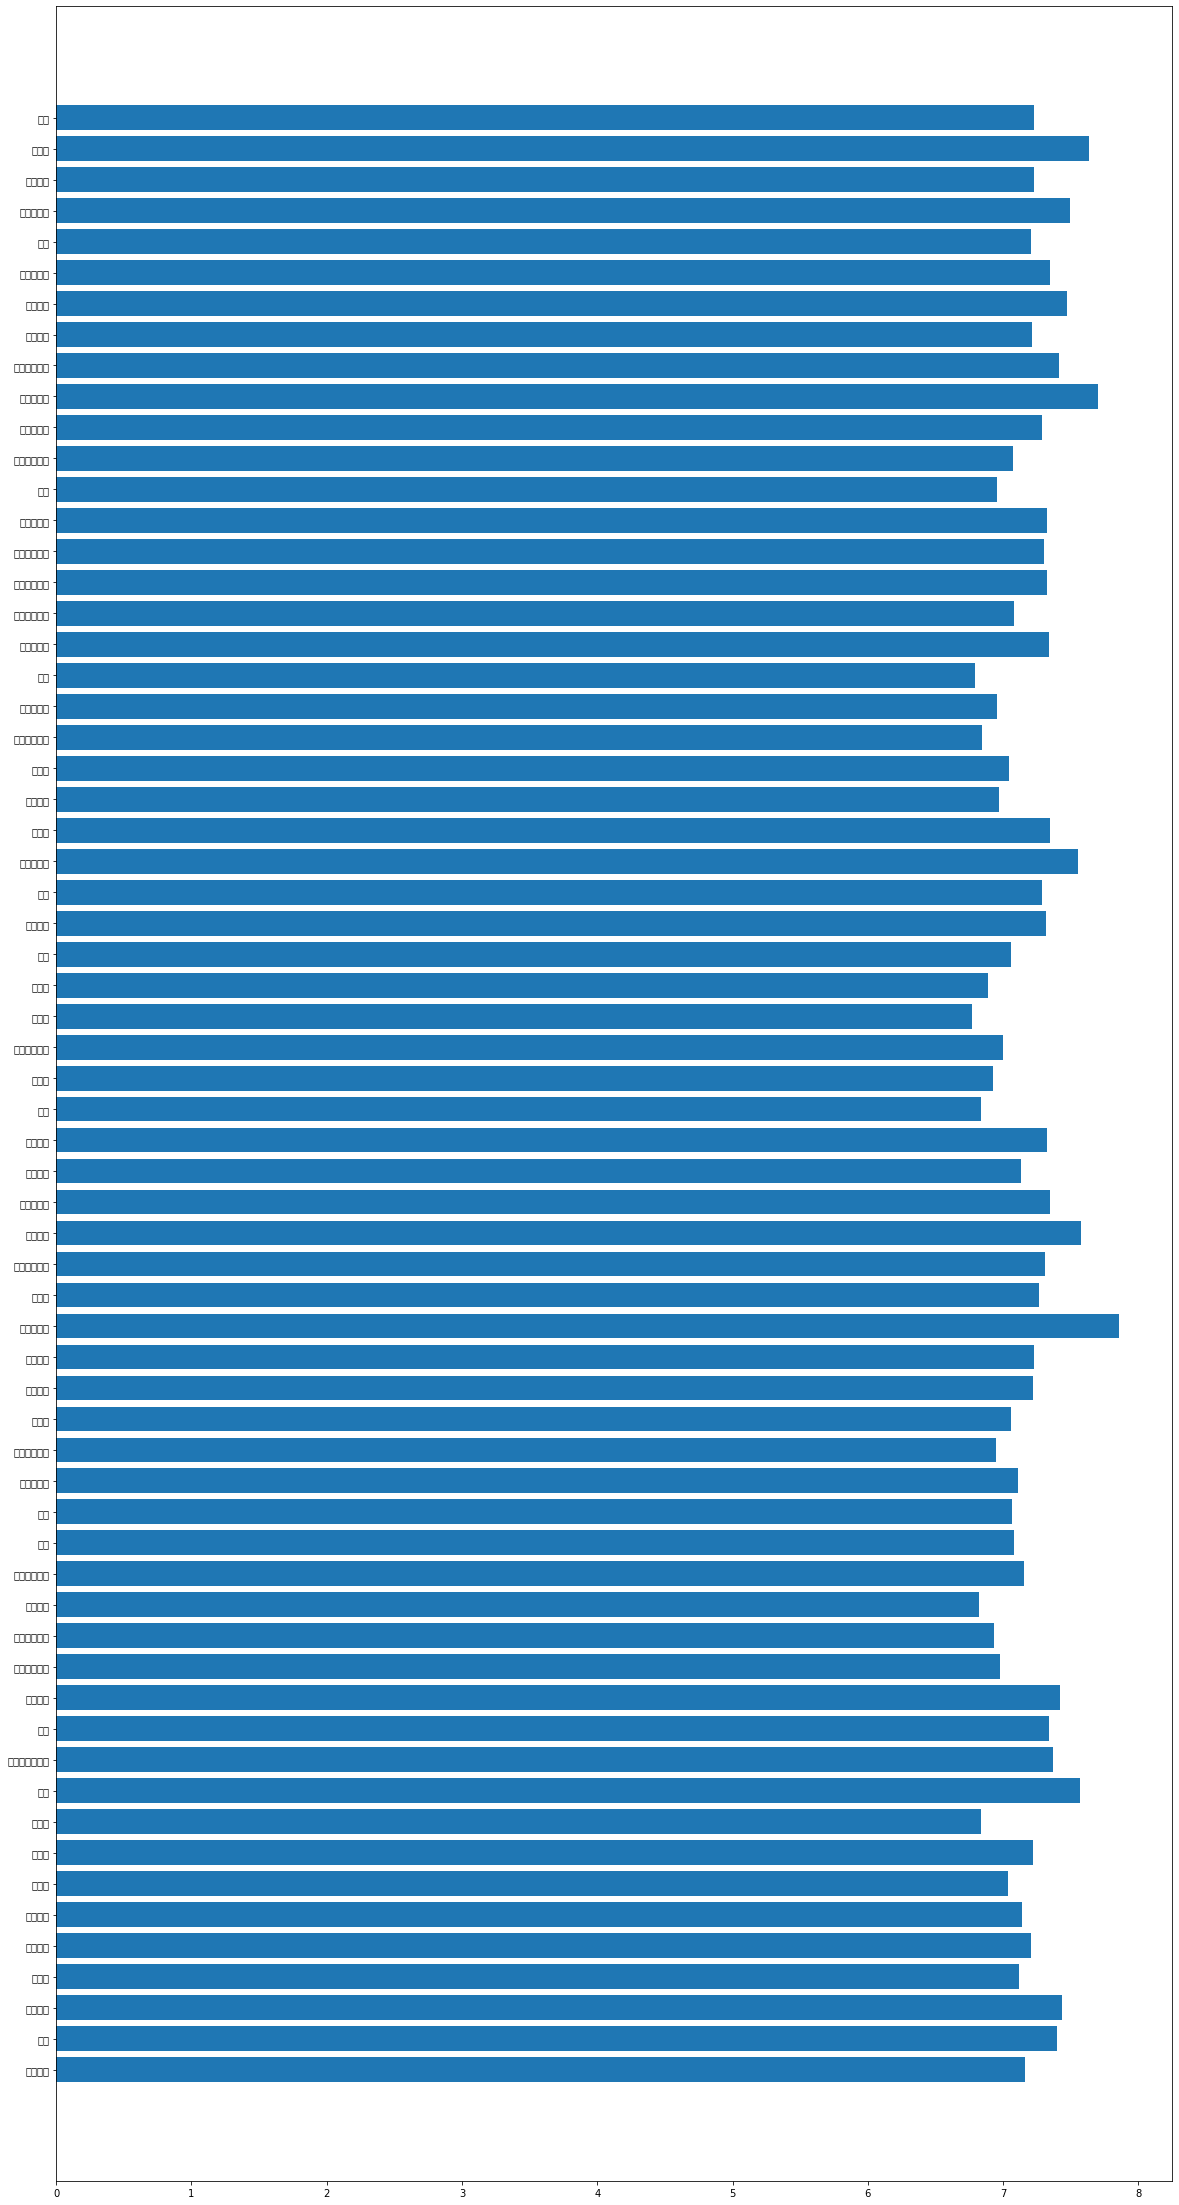

In [25]:
x=train['間取り'].unique()
y=train['取引価格（総額）_log'].groupby(train['間取り']).mean()
print(x, len(x))
print(y, len(y))

fig=plt.figure(figsize=(20,40))

plt.barh(x, y)
plt.show()


### 面積 
使う

In [26]:
train['面積（㎡）'].unique()

array(['45', '15', '80', '60', '75', '70', '40', '20', '85', '65', '55',
       '25', '95', '30', '90', '120', '35', '105', '500', '50', '100',
       '110', '160', '130', '10', '180', '400', '330', '115', '135',
       '140', '230', '150', '290', '145', '170', '210', '630', '125',
       '155', '200', '190', '220', '2000㎡以上', '260', '480', '360', '195',
       '175', '320', '440', '165', '740', 80, 20, 75, 70, 65, 25, 10, 100,
       15, 85, 60, 45, 35, 50, 140, 55, 30, 110, 105, 95, 40, 90, 115,
       135, 120, 150, 145, 280, 165, 370, 190, 130, 350, 125, 160, 195,
       '830', '470', '300', '980', '710', '270', '820', 460, 520, 180,
       230, 310, 260, 570, 175, 480, 155, 300, 185, 270, 170, 200, 680,
       390, 410, 220, 790, 240, 600, 250, 730, 340, 690, 650, 760, 670,
       290, 970, 440, 610, '590', '780', '650', '185', '410', '660',
       '250', '620', '240', '760', '670', '1300', '340', '460', 210, 500,
       1100, 700, 450, 490, 800, 430, 950, 1000, 510, 320, 550, 360

In [27]:
#面積の欠損値はなし、'2000㎡以上'は'2000'で補完
train['面積（㎡）']=train['面積（㎡）'].replace('2000㎡以上','2000')
train['面積（㎡）'].unique()

array(['45', '15', '80', '60', '75', '70', '40', '20', '85', '65', '55',
       '25', '95', '30', '90', '120', '35', '105', '500', '50', '100',
       '110', '160', '130', '10', '180', '400', '330', '115', '135',
       '140', '230', '150', '290', '145', '170', '210', '630', '125',
       '155', '200', '190', '220', '2000', '260', '480', '360', '195',
       '175', '320', '440', '165', '740', 80, 20, 75, 70, 65, 25, 10, 100,
       15, 85, 60, 45, 35, 50, 140, 55, 30, 110, 105, 95, 40, 90, 115,
       135, 120, 150, 145, 280, 165, 370, 190, 130, 350, 125, 160, 195,
       '830', '470', '300', '980', '710', '270', '820', 460, 520, 180,
       230, 310, 260, 570, 175, 480, 155, 300, 185, 270, 170, 200, 680,
       390, 410, 220, 790, 240, 600, 250, 730, 340, 690, 650, 760, 670,
       290, 970, 440, 610, '590', '780', '650', '185', '410', '660',
       '250', '620', '240', '760', '670', '1300', '340', '460', 210, 500,
       1100, 700, 450, 490, 800, 430, 950, 1000, 510, 320, 550, 360, 7

In [28]:
#面積の欠損値はなし、'2000㎡以上'は'2000'で補完
train['面積（㎡）']=train['面積（㎡）'].replace('2000㎡以上','2000')
train['面積（㎡）'].unique()
#文字列型から整数型に変換
train['面積（㎡）']=train['面積（㎡）'].astype(int)
train['面積（㎡）'].unique()

array([  45,   15,   80,   60,   75,   70,   40,   20,   85,   65,   55,
         25,   95,   30,   90,  120,   35,  105,  500,   50,  100,  110,
        160,  130,   10,  180,  400,  330,  115,  135,  140,  230,  150,
        290,  145,  170,  210,  630,  125,  155,  200,  190,  220, 2000,
        260,  480,  360,  195,  175,  320,  440,  165,  740,  280,  370,
        350,  830,  470,  300,  980,  710,  270,  820,  460,  520,  310,
        570,  185,  680,  390,  410,  790,  240,  600,  250,  730,  340,
        690,  650,  760,  670,  970,  610,  590,  780,  660,  620, 1300,
       1100,  700,  450,  490,  800,  430,  950, 1000,  510,  550,  940,
        850,  900,  580,  960,  380,  990,  540,  770,  560, 1400,  530,
        420,  860, 1500,  720,  890,  870, 1200])

In [29]:
#間取りと面積の関係を確認する
train['面積（㎡）'].groupby(train['間取り']).mean()

間取り
オープンフロア     82.308579
スタジオ        30.000000
メゾネット       71.363636
１ＤＫ         45.044601
１ＤＫ＋Ｋ      105.000000
１ＤＫ＋Ｓ       43.411765
１Ｋ          20.367096
１Ｋ＋Ｓ        29.545455
１Ｌ          20.555556
１Ｌ＋Ｓ        57.500000
１ＬＤ＋Ｓ       60.000000
１ＬＤＫ        45.146181
１ＬＤＫ＋Ｓ      56.449275
１ＬＫ         38.846154
１ＬＫ＋Ｓ       30.000000
１Ｒ          19.389919
１Ｒ＋Ｓ        33.181818
２Ｄ          35.000000
２ＤＫ         46.451684
２ＤＫ＋Ｓ       51.885593
２Ｋ          31.212012
２Ｋ＋Ｓ        41.363636
２Ｌ          62.500000
２Ｌ＋Ｓ        60.000000
２ＬＤ         85.000000
２ＬＤ＋Ｓ       60.000000
２ＬＤＫ        60.428721
２ＬＤＫ＋Ｋ      80.000000
２ＬＤＫ＋Ｓ      65.142349
２ＬＫ         55.476190
２ＬＫ＋Ｓ       62.500000
３Ｄ          47.500000
３ＤＫ         52.428861
３ＤＫ＋Ｓ       60.519481
３Ｋ          47.976879
３Ｋ＋Ｓ        53.333333
３ＬＤ         59.000000
３ＬＤ＋Ｓ       83.000000
３ＬＤＫ        70.022388
３ＬＤＫ＋Ｋ     110.714286
３ＬＤＫ＋Ｓ      82.455268
３ＬＫ         59.051724
４Ｄ          60.000000
４ＤＫ         66.277293
４ＤＫ＋Ｓ       73.181818
４Ｋ    

['２ＬＤＫ' '１Ｋ' '４ＬＤＫ' '３ＤＫ' '３ＬＤＫ' '１ＬＤＫ' '１ＤＫ' '４ＤＫ' '２ＤＫ' '２Ｋ' 'オープンフロア'
 '１Ｒ' '５ＬＤＫ' '１ＬＤＫ＋Ｓ' '３ＬＤＫ＋Ｓ' '１Ｒ＋Ｓ' '２ＬＤＫ＋Ｓ' '４Ｋ' '３Ｋ' '３ＤＫ＋Ｓ' '４ＬＤＫ＋Ｓ'
 '５ＤＫ' '４Ｌ＋Ｋ' 'スタジオ' '２ＤＫ＋Ｓ' '６ＤＫ' '６ＬＤＫ＋Ｓ' '７ＬＤＫ' '１ＤＫ＋Ｓ' '６ＬＤＫ' '１Ｋ＋Ｓ'
 '３Ｄ' '１ＬＫ' '５ＬＤＫ＋Ｓ' '７ＤＫ' '３ＬＫ' '５Ｋ' '２Ｋ＋Ｓ' '１Ｌ' '４ＤＫ＋Ｓ' '３ＬＤ' '８ＬＤＫ'
 '２ＬＫ' '３ＬＤＫ＋Ｋ' '３ＬＤ＋Ｓ' '４Ｌ' 'メゾネット' '４ＬＤＫ＋Ｋ' '８ＬＤＫ＋Ｓ' '７ＬＤＫ＋Ｓ' '２ＬＤ＋Ｓ'
 '２Ｌ' '２ＬＤＫ＋Ｋ' '１ＬＤ＋Ｓ' '２ＬＫ＋Ｓ' '５ＬＤＫ＋Ｋ' '２Ｌ＋Ｓ' '３Ｋ＋Ｓ' '１ＤＫ＋Ｋ' '２Ｄ' '１ＬＫ＋Ｓ'
 '１Ｌ＋Ｓ' '２ＬＤ' '４Ｄ'] 64
間取り
オープンフロア     82.308579
スタジオ        30.000000
メゾネット       71.363636
１ＤＫ         45.044601
１ＤＫ＋Ｋ      105.000000
１ＤＫ＋Ｓ       43.411765
１Ｋ          20.367096
１Ｋ＋Ｓ        29.545455
１Ｌ          20.555556
１Ｌ＋Ｓ        57.500000
１ＬＤ＋Ｓ       60.000000
１ＬＤＫ        45.146181
１ＬＤＫ＋Ｓ      56.449275
１ＬＫ         38.846154
１ＬＫ＋Ｓ       30.000000
１Ｒ          19.389919
１Ｒ＋Ｓ        33.181818
２Ｄ          35.000000
２ＤＫ         46.451684
２ＤＫ＋Ｓ       51.885593
２Ｋ          31.212012
２Ｋ＋Ｓ        41.363636
２Ｌ          62.500000
２Ｌ＋Ｓ        60.000000
２ＬＤ    

/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65298 (\N{FULLWIDTH DIGIT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65324 (\N{FULLWIDTH LATIN CAPITAL LETTER L}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65316 (\N{FULLWIDTH LATIN CAPITAL LETTER D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65323 (\N{FULLWIDTH LATIN CAPITAL LETTER K}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65

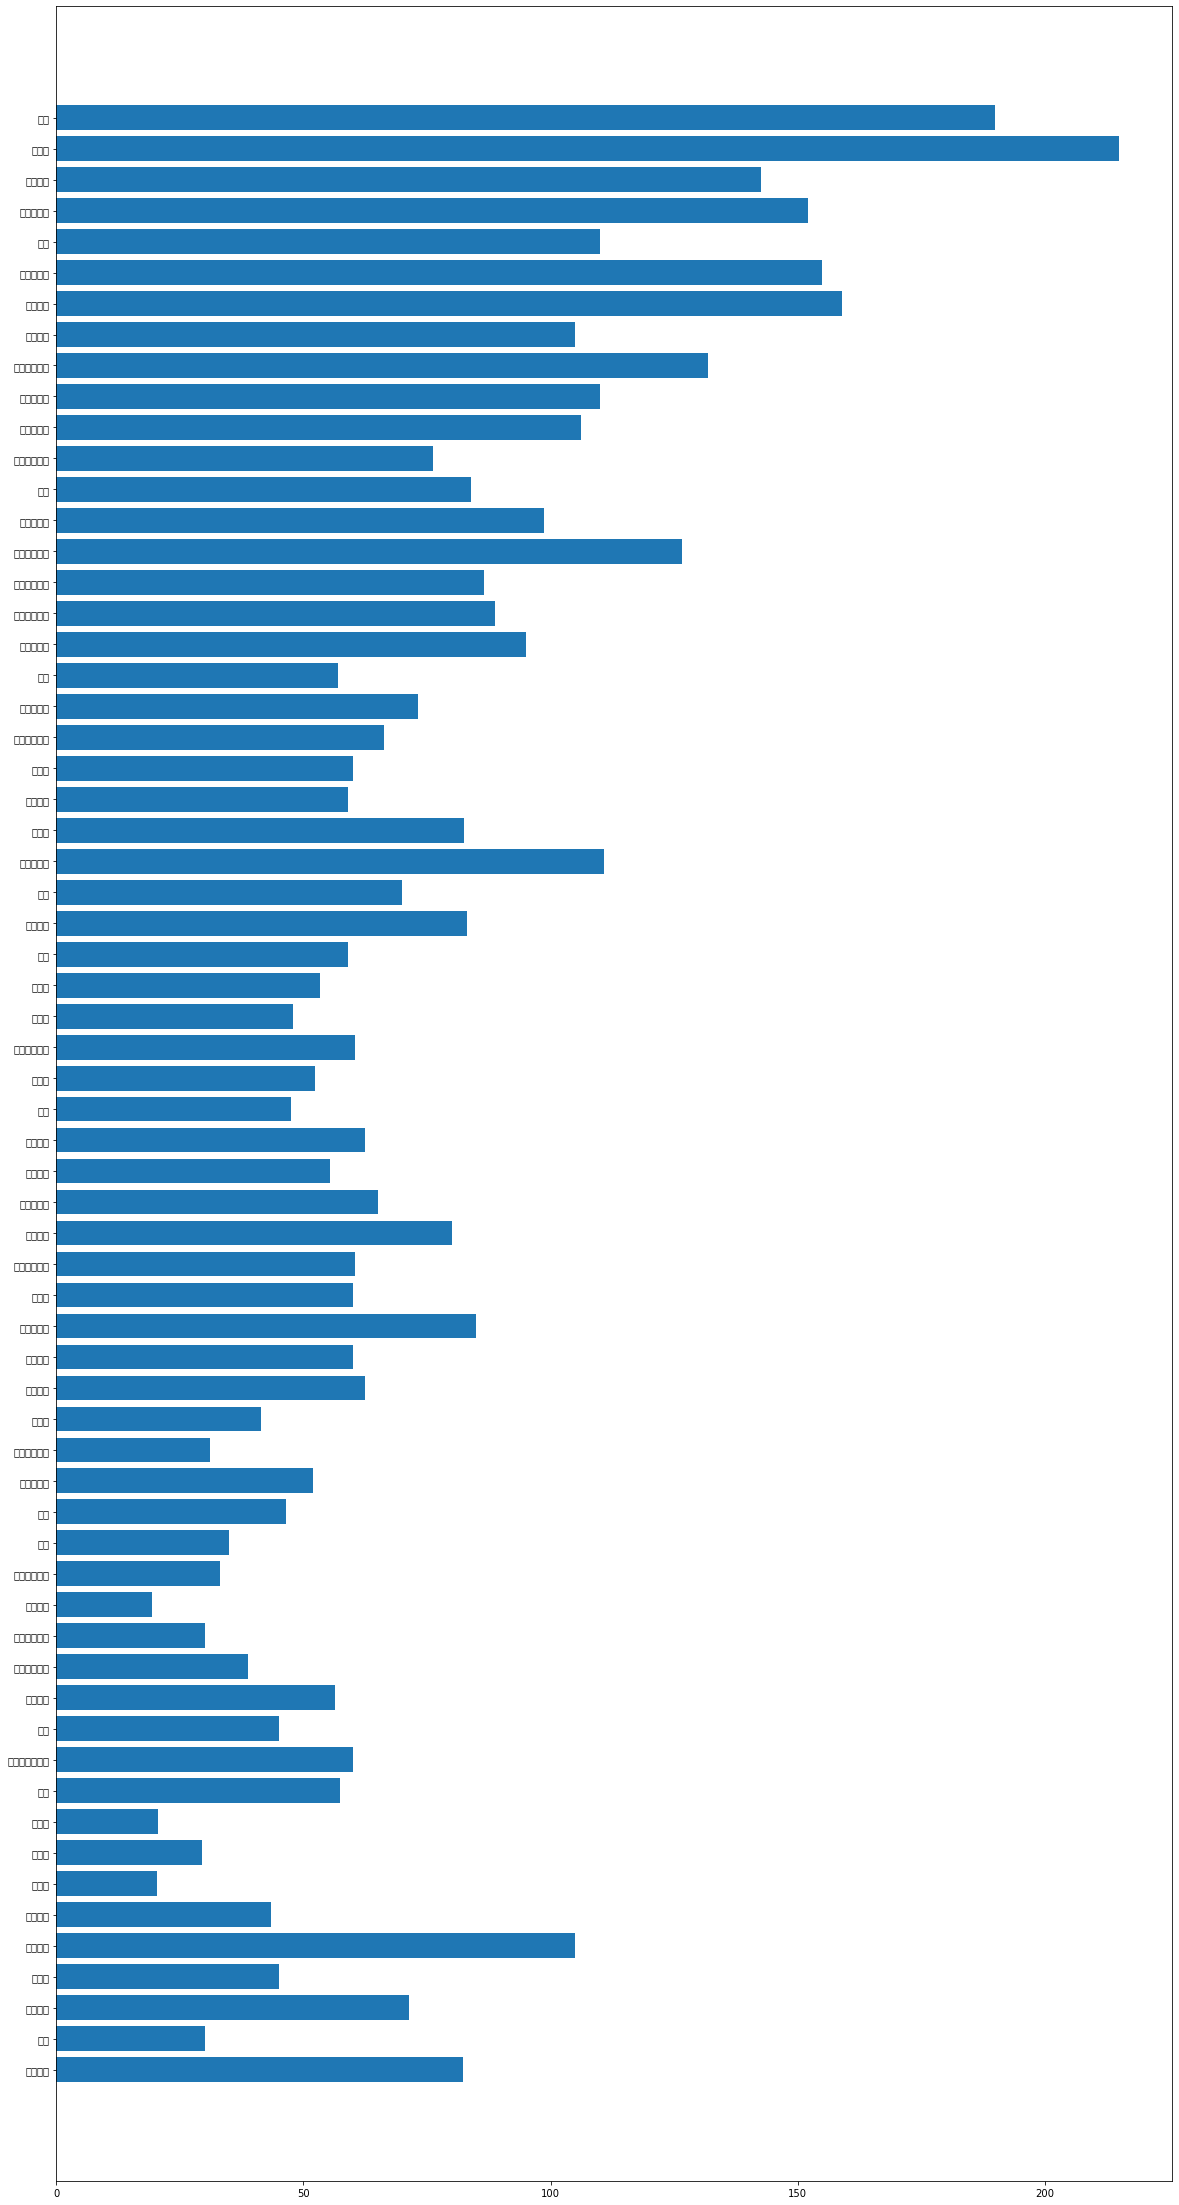

In [30]:
x=train['間取り'].unique()
y=train['面積（㎡）'].groupby(train['間取り']).mean()
print(x, len(x))
print(y, len(y))

fig=plt.figure(figsize=(20,40))

plt.barh(x, y)
plt.show()

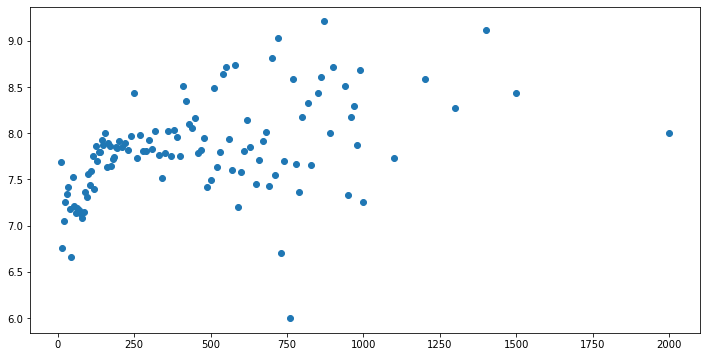

In [31]:
#面積と価格の関係を確認する
x=train['面積（㎡）'].unique()
y=train['取引価格（総額）_log'].groupby(train['面積（㎡）']).mean()

fig=plt.figure(figsize=(12,6))
plt.scatter(x,y)
plt.show()

In [32]:
#面積と価格の相関を確認
np.corrcoef(train['面積（㎡）'], train['取引価格（総額）_log'])

#面積が広いほど価格が高い

array([[1.        , 0.37030493],
       [0.37030493, 1.        ]])

### 建築年 
使う

In [33]:
train['建築年'].unique()

array(['昭和63年', '昭和64年', '平成18年', '昭和62年', '平成14年', '平成7年', '平成13年',
       '平成9年', '平成3年', '平成11年', '平成2年', '平成10年', '平成21年', '昭和59年', '平成8年',
       '平成6年', '平成19年', '平成20年', '平成25年', '平成22年', '平成27年', '昭和61年',
       '平成15年', '平成17年', '平成4年', '平成16年', '昭和60年', '平成24年', '平成26年',
       '昭和52年', '昭和49年', '平成23年', '平成12年', nan, '昭和50年', '昭和54年', '昭和47年',
       '平成31年', '昭和57年', '平成5年', '昭和58年', '昭和55年', '昭和56年', '平成28年',
       '昭和46年', '昭和44年', '平成30年', '昭和53年', '昭和51年', '平成29年', '戦前',
       '昭和36年', '昭和48年', '令和2年', '昭和43年', '令和3年', '昭和23年', '昭和31年',
       '昭和40年', '昭和45年', '昭和41年', '昭和28年', '昭和42年', '昭和22年', '昭和39年',
       '昭和37年', '昭和27年', '昭和33年', '昭和32年', '昭和25年', '昭和24年', '昭和26年',
       '昭和34年', '昭和38年', '昭和21年', '昭和35年', '昭和29年', '昭和30年', '令和4年'],
      dtype=object)

In [34]:
#欠損値を補完, nanのままだとうまくいかないので文字列でnullと入れておく
train['建築年']=train['建築年'].fillna('null')

#確認
train['建築年'].unique()

array(['昭和63年', '昭和64年', '平成18年', '昭和62年', '平成14年', '平成7年', '平成13年',
       '平成9年', '平成3年', '平成11年', '平成2年', '平成10年', '平成21年', '昭和59年', '平成8年',
       '平成6年', '平成19年', '平成20年', '平成25年', '平成22年', '平成27年', '昭和61年',
       '平成15年', '平成17年', '平成4年', '平成16年', '昭和60年', '平成24年', '平成26年',
       '昭和52年', '昭和49年', '平成23年', '平成12年', 'null', '昭和50年', '昭和54年',
       '昭和47年', '平成31年', '昭和57年', '平成5年', '昭和58年', '昭和55年', '昭和56年',
       '平成28年', '昭和46年', '昭和44年', '平成30年', '昭和53年', '昭和51年', '平成29年',
       '戦前', '昭和36年', '昭和48年', '令和2年', '昭和43年', '令和3年', '昭和23年', '昭和31年',
       '昭和40年', '昭和45年', '昭和41年', '昭和28年', '昭和42年', '昭和22年', '昭和39年',
       '昭和37年', '昭和27年', '昭和33年', '昭和32年', '昭和25年', '昭和24年', '昭和26年',
       '昭和34年', '昭和38年', '昭和21年', '昭和35年', '昭和29年', '昭和30年', '令和4年'],
      dtype=object)

In [35]:
#和暦から西暦に変換する
import random

def seireki(df):
    l=[]

    y=df['建築年']
    
    for i in range(0,len(y),1):
    #for i in range(0,10):
        
        #年号が令和、令和2年=2018+2=2020年
        if y.iloc[i][:2]=='令和':
            if y.iloc[i][3]=='年':
                year=2018+int(y.iloc[i][2]) 
            else:
                year=2018+int(y.iloc[i][2])*10+int(y.iloc[i][3]) 
            l.append(year)

        
        #年号が平成、平成2年=1988+2=1991年
        elif y.iloc[i][:2]=='平成':
            if y.iloc[i][3]=='年':
                year=1988+int(y.iloc[i][2])
            else:
                year=1988+int(y.iloc[i][2])*10+int(y.iloc[i][3]) 
            l.append(year)
            

        #年号が昭和、昭和2年=1925+2=1927年
        elif y.iloc[i][:2]=='昭和':
            if y.iloc[i][3]=='年':
                year=1925+int(y.iloc[i][2])
            else:
                year=1925+int(y.iloc[i][2])*10+int(y.iloc[i][3]) 
            l.append(year)

        #年号が戦前、1868年から1945年の値をランダムに格納
        #1945年に終戦
        elif y.iloc[i][:2]=='戦前':
            year=random.randint(1868, 1945)
            l.append(year)

        #年号が欠損、1868年から2021年の値をランダムに格納
        else:
            year=random.randint(1868, 2021)
            l.append(year)
    
    
    #戻り値：西暦に変換した値が格納されたリスト
    return l

In [36]:
#欠損値を補完, nanのままだとうまくいかないので文字列でnullと入れておく
train['建築年']=train['建築年'].fillna('null')

#trainデータをseireki関数の引数として渡して、結果を変数resultに格納
result=seireki(train)
print(len(result))

#resultをtrain['建築年']に格納
train['建築年']=result

722574


In [37]:
train['建築年'].unique()

array([1988, 1989, 2006, 1987, 2002, 1995, 2001, 1997, 1991, 1999, 1990,
       1998, 2009, 1984, 1996, 1994, 2007, 2008, 2013, 2010, 2015, 1986,
       2003, 2005, 1992, 2004, 1985, 2012, 2014, 1977, 1974, 2011, 2000,
       1952, 1975, 1979, 1972, 2019, 1982, 1993, 1983, 1980, 1981, 1885,
       1965, 2018, 1961, 2016, 1971, 1969, 1872, 1978, 1976, 1897, 1922,
       2017, 2020, 1925, 1930, 1934, 1869, 1937, 1941, 1903, 1967, 1928,
       1973, 1901, 1926, 1968, 1929, 1900, 1884, 1876, 1875, 1933, 1873,
       1908, 1887, 1880, 1958, 2021, 1912, 1890, 1951, 1946, 1940, 1919,
       1892, 1964, 1956, 1891, 1915, 1963, 1942, 1935, 1911, 1895, 1893,
       1913, 1950, 1871, 1927, 1909, 1945, 1868, 1910, 1948, 1906, 1877,
       1870, 1962, 1923, 1881, 1889, 1896, 1917, 1904, 1882, 1938, 1944,
       1955, 1888, 1914, 1918, 1899, 1954, 1894, 1943, 1920, 1939, 1970,
       1931, 1874, 1905, 1960, 1932, 1902, 1966, 1886, 1959, 1878, 1936,
       1921, 1947, 1949, 1883, 1953, 1898, 1916, 19

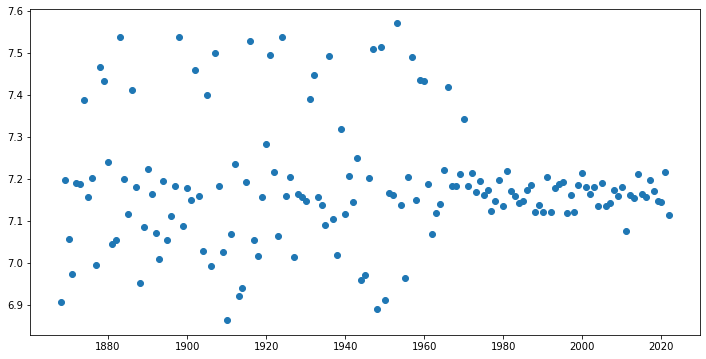

In [38]:
#建築年と価格の関係を確認する
x=train['建築年'].unique()
y=train['取引価格（総額）_log'].groupby(train['建築年']).mean()

fig=plt.figure(figsize=(12,6))
plt.scatter(x,y)
plt.show()

In [39]:
#建築年と価格の相関を確認
np.corrcoef(train['建築年'], train['取引価格（総額）_log'])

#建築年が新しい（築浅）は価格が高い

array([[1.        , 0.39079315],
       [0.39079315, 1.        ]])

### 建物の構造 
使う

In [40]:
train['建物の構造'].unique()

array(['ＲＣ', 'ＳＲＣ', nan, '鉄骨造', 'ＲＣ、鉄骨造', '木造', 'ＳＲＣ、ＲＣ', 'ＳＲＣ、鉄骨造',
       'ＳＲＣ、ＲＣ、鉄骨造', '軽量鉄骨造', 'ブロック造', 'ＲＣ、ブロック造', 'ＲＣ、木造'], dtype=object)

In [41]:
#欠損値は文字列nullで対応
train['建物の構造']=train['建物の構造'].fillna('null')

/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65330 (\N{FULLWIDTH LATIN CAPITAL LETTER R}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65315 (\N{FULLWIDTH LATIN CAPITAL LETTER C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65331 (\N{FULLWIDTH LATIN CAPITAL LETTER S}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37444 (\N{CJK UNIFIED IDEOGRAPH-9244}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: G

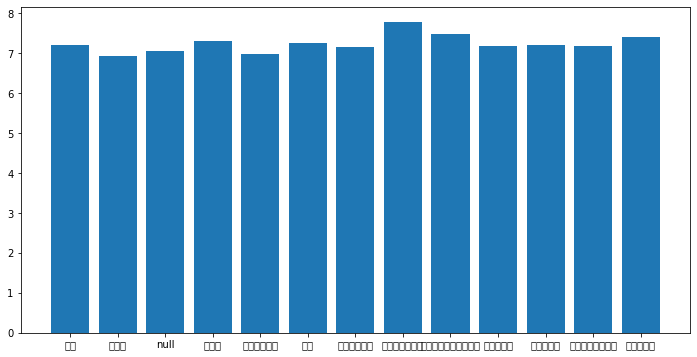

In [42]:
#建物の構造と価格の関係を確認
x=train['建物の構造'].unique()
y=train['取引価格（総額）_log'].groupby(train['建物の構造']).mean()

fig=plt.figure(figsize=(12,6))
plt.bar(x,y)
plt.show()

In [43]:
x,y

(array(['ＲＣ', 'ＳＲＣ', 'null', '鉄骨造', 'ＲＣ、鉄骨造', '木造', 'ＳＲＣ、ＲＣ', 'ＳＲＣ、鉄骨造',
        'ＳＲＣ、ＲＣ、鉄骨造', '軽量鉄骨造', 'ブロック造', 'ＲＣ、ブロック造', 'ＲＣ、木造'], dtype=object),
 建物の構造
 null          7.211324
 ブロック造         6.942914
 木造            7.057351
 軽量鉄骨造         7.298040
 鉄骨造           6.983370
 ＲＣ            7.253349
 ＲＣ、ブロック造      7.168730
 ＲＣ、木造         7.778151
 ＲＣ、鉄骨造        7.474149
 ＳＲＣ           7.175312
 ＳＲＣ、鉄骨造       7.203266
 ＳＲＣ、ＲＣ        7.189263
 ＳＲＣ、ＲＣ、鉄骨造    7.397940
 Name: 取引価格（総額）_log, dtype: float64)

In [44]:
#欠損値は文字列nullで対応
train['建物の構造']=train['建物の構造'].fillna('null')

#nullは最も多いRCで補完
train['建物の構造']=='null'
train['建物の構造']=train['建物の構造'].replace('null','ＲＣ')
train['建物の構造'].unique()

array(['ＲＣ', 'ＳＲＣ', '鉄骨造', 'ＲＣ、鉄骨造', '木造', 'ＳＲＣ、ＲＣ', 'ＳＲＣ、鉄骨造',
       'ＳＲＣ、ＲＣ、鉄骨造', '軽量鉄骨造', 'ブロック造', 'ＲＣ、ブロック造', 'ＲＣ、木造'], dtype=object)

In [45]:
#欠損値は文字列nullで対応
train['建物の構造']=train['建物の構造'].fillna('null')

#nullは最も多いRCで補完
train['建物の構造']=='null'
train['建物の構造']=train['建物の構造'].replace('null','ＲＣ')
train['建物の構造'].unique()

#建物の構造ごとにいくつあるか集計
train.groupby(['建物の構造']).count() 

#RC:488914, SRC:208345, 鉄構造:4717の順に多い
#全体の平均：train['取引価格（総額）_log'].mean()=7.227968247625857より高いor低いの2グループに分ける
#建物の構造_new: 0=低い、1=高い
train['建物の構造']=train['建物の構造'].replace('ブロック造',0)
train['建物の構造']=train['建物の構造'].replace('木造',0)
train['建物の構造']=train['建物の構造'].replace('鉄骨造',0)
train['建物の構造']=train['建物の構造'].replace('ＲＣ、ブロック造',0)
train['建物の構造']=train['建物の構造'].replace('ＳＲＣ',0)
train['建物の構造']=train['建物の構造'].replace('ＳＲＣ、鉄骨造',0)
train['建物の構造']=train['建物の構造'].replace('ＳＲＣ、ＲＣ',0)

train['建物の構造']=train['建物の構造'].replace('軽量鉄骨造',1)
train['建物の構造']=train['建物の構造'].replace('ＲＣ',1)
train['建物の構造']=train['建物の構造'].replace('ＲＣ、木造',1)
train['建物の構造']=train['建物の構造'].replace('ＲＣ、鉄骨造',1)
train['建物の構造']=train['建物の構造'].replace('ＳＲＣ、ＲＣ、鉄骨造',1)
   

In [46]:
train.corr()

,ID,市区町村コード,最寄駅：距離（分）,面積（㎡）,建築年,建物の構造,建ぺい率（％）,容積率（％）,取引価格（総額）_log
ID,1.000000,0.999942,0.059513,0.074505,-0.015769,-0.052255,0.055475,0.001019,-0.155546
市区町村コード,0.999942,1.000000,0.060479,0.075553,-0.015601,-0.052447,0.056026,0.001273,-0.156754
最寄駅：距離（分）,0.059513,0.060479,1.000000,0.149370,-0.101477,0.066349,-0.296396,-0.315750,-0.218074
面積（㎡）,0.074505,0.075553,0.149370,1.000000,0.030717,0.020143,-0.254798,-0.282726,0.370305
建築年,-0.015769,-0.015601,-0.101477,0.030717,1.000000,0.187170,0.101795,0.118450,0.390793
建物の構造,-0.052255,-0.052447,0.066349,0.020143,0.187170,1.000000,-0.265693,-0.288329,0.103881
建ぺい率（％）,0.055475,0.056026,-0.296396,-0.254798,0.101795,-0.265693,1.000000,0.768757,0.027747
容積率（％）,0.001019,0.001273,-0.315750,-0.282726,0.118450,-0.288329,0.768757,1.000000,0.114598
取引価格（総額）_log,-0.155546,-0.156754,-0.218074,0.370305,0.390793,0.103881,0.027747,0.114598,1.000000


### 用途 
使わない

In [47]:
train['用途'].unique()

array(['住宅', nan, '事務所', '店舗', 'その他', '住宅、事務所', '事務所、店舗', '住宅、店舗',
       '駐車場、店舗', '住宅、駐車場', '住宅、その他', '店舗、その他', '駐車場', '倉庫',
       '住宅、事務所、駐車場、店舗', '倉庫、駐車場', '倉庫、店舗', '工場', '住宅、店舗、その他', '作業場',
       '事務所、駐車場', '事務所、倉庫', '住宅、倉庫'], dtype=object)

In [48]:
#欠損値はnull、用途と価格の関係
train['取引価格（総額）_log'].groupby(train['用途']).mean()

用途
その他              6.845861
事務所              6.990359
事務所、倉庫           7.565167
事務所、店舗           7.267058
事務所、駐車場          6.939519
住宅               7.225848
住宅、その他           7.146869
住宅、事務所           7.236381
住宅、事務所、駐車場、店舗    7.505150
住宅、倉庫            7.740363
住宅、店舗            6.988946
住宅、店舗、その他        6.903090
住宅、駐車場           7.582004
作業場              7.659302
倉庫               6.646006
倉庫、店舗            7.216245
倉庫、駐車場           6.942198
工場               7.233756
店舗               7.152388
店舗、その他           8.278151
駐車場              6.657856
駐車場、店舗           6.840892
Name: 取引価格（総額）_log, dtype: float64

### 今後の利用目的 
使う

In [49]:
train['今後の利用目的'].unique()

array(['住宅', nan, 'その他', '店舗', '事務所'], dtype=object)

In [50]:
#欠損値はnull、都市計画と価格の関係
train['今後の利用目的']=train['今後の利用目的'].fillna('その他')
train['取引価格（総額）_log'].groupby(train['今後の利用目的']).mean()
#住宅は1,そのほかは0
train['今後の利用目的']=train['今後の利用目的'].replace('住宅',1)
train['今後の利用目的']=train['今後の利用目的'].replace({'その他':0, '事務所':0, '店舗':0})


### 都市計画 
使う

In [51]:
train['都市計画'].unique()

array(['第１種中高層住居専用地域', '商業地域', '第２種住居地域', nan, '第１種住居地域', '近隣商業地域',
       '工業地域', '準工業地域', '第１種低層住居専用地域', '第２種中高層住居専用地域', '準住居地域',
       '市街化区域及び市街化調整区域外の都市計画区域', '第２種低層住居専用地域', '市街化調整区域', '工業専用地域',
       '都市計画区域外', '準都市計画区域'], dtype=object)

In [52]:
#欠損値はnull、都市計画と価格の関係
a=train['取引価格（総額）_log'].groupby(train['都市計画']).mean()
len(a)

16

In [53]:
a

都市計画
商業地域                      7.249770
工業地域                      7.268333
工業専用地域                    7.474801
市街化区域及び市街化調整区域外の都市計画区域    6.886311
市街化調整区域                   6.850626
準住居地域                     7.241021
準工業地域                     7.287054
準都市計画区域                   7.214626
第１種中高層住居専用地域              7.183006
第１種低層住居専用地域               7.324170
第１種住居地域                   7.180478
第２種中高層住居専用地域              7.195715
第２種低層住居専用地域               7.388221
第２種住居地域                   7.271919
近隣商業地域                    7.236268
都市計画区域外                   6.122405
Name: 取引価格（総額）_log, dtype: float64

In [54]:
#住居グループ:1と商業工業グループ:0に分ける
train['都市計画']=train['都市計画'].replace('商業地域',0)
train['都市計画']=train['都市計画'].replace('工業地域',0)
train['都市計画']=train['都市計画'].replace('工業専用地域',0)
train['都市計画']=train['都市計画'].replace('近隣商業地域',0)
train['都市計画']=train['都市計画'].replace('商業地域',0)
train['都市計画']=train['都市計画'].replace('準工業地域',0)
train['都市計画']=train['都市計画'].replace('準都市計画区域',0)

train['都市計画']=train['都市計画'].replace('市街化区域及び市街化調整区域外の都市計画区域',1)
train['都市計画']=train['都市計画'].replace('市街化調整区域',1)
train['都市計画']=train['都市計画'].replace('準住居地域',1)
train['都市計画']=train['都市計画'].replace('第１種中高層住居専用地域',1)
train['都市計画']=train['都市計画'].replace('第１種低層住居専用地域',1)
train['都市計画']=train['都市計画'].replace('第１種住居地域',1)
train['都市計画']=train['都市計画'].replace('第２種中高層住居専用地域',1)
train['都市計画']=train['都市計画'].replace('第２種低層住居専用地域',1)
train['都市計画']=train['都市計画'].replace('第２種住居地域',1)
train['都市計画']=train['都市計画'].replace('都市計画区域外',1)

train['都市計画']=train['都市計画'].fillna(1)

#train['取引価格（総額）_log'].groupby(train['都市計画']).mean()
train['都市計画'].unique()

array([1., 0.])

In [55]:
train['取引価格（総額）_log'].groupby(train['都市計画']).mean()

都市計画
0.0    7.256465
1.0    7.197789
Name: 取引価格（総額）_log, dtype: float64

### 建ぺい率 
使わない

In [56]:
train['建ぺい率（％）'].unique()

array([60., 80., nan, 50., 40., 70., 30.])

### 容積率 
使わない

In [57]:
train['容積率（％）'].unique()

array([ 150.,  400.,  200.,   nan,  300.,  500.,   80.,  600.,  100.,
         50.,  700.,   60.,  800., 1000.,  900., 1200., 1100., 1300.])

### 改装 
使わない

In [58]:
train['改装'].unique()

array(['改装済', '未改装', nan], dtype=object)

In [59]:
#欠損値はnull、改装と価格の関係
train['取引価格（総額）_log'].groupby(train['改装']).mean()

#改装済みは１、未改装は０、nullは未改装の0で補完
train['改装']=train['改装'].replace('未改装',0)
train['改装']=train['改装'].replace('改装済',1)
train['改装'].fillna(0)

0        1.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
37374    1.0
37375    0.0
37376    0.0
37377    0.0
37378    0.0
Name: 改装, Length: 722574, dtype: float64

### 都道府県、市区町村の代わりにその都市の人口を用いる

In [60]:
#各市区町村の人口
population=pd.read_csv('./data/population.csv')
population=population[['団体名','計']]
population=population.rename(columns={'団体名': '市区町村名'})

#人口の列のカンマを消去
for i in range(len(population)):
    population.iloc[i]['計']=population.iloc[i]['計'].replace(',' , '')
#文字列型から整数型に変換
population['計']=population['計'].astype(int)

In [61]:
#人口データに含まれないデータを用意
diff=pd.DataFrame({
    '市区町村名' : ['あま市',
                             'みよし市',
                             '岡山市中区',
                             '岡山市北区',
                             '岡山市南区',
                             '熊本市中央区',
                             '熊本市北区',
                             '熊本市南区',
                             '熊本市東区',
                             '熊本市西区',
                             '白岡市',
                             '相模原市中央区',
                             '相模原市南区',
                             '相模原市緑区',
                             '長久手市',
                             '鶴ケ島市'],
    '計': [87650, 6278, 148648, 314087, 165877, 187502, 139833, 130829, 189524, 91177, 52430, 274308, 283176, 169176, 61500, 69940]
})
diff.head()

,市区町村名,計
0,あま市,87650
1,みよし市,6278
2,岡山市中区,148648
3,岡山市北区,314087
4,岡山市南区,165877


In [62]:
#人口データと存在しないデータを結合してそれを人口データとして用いる
population=pd.concat([population,diff])
population.head()
#print(len(population))
population['計']=population['計'].astype(int)
population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2353 entries, 0 to 15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   市区町村名   2353 non-null   object
 1   計       2353 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 55.1+ KB


In [63]:
n=[]

for i in range(0,12):
    n.append(len(train)/12*i)
        
n

[0.0,
 60214.5,
 120429.0,
 180643.5,
 240858.0,
 301072.5,
 361287.0,
 421501.5,
 481716.0,
 541930.5,
 602145.0,
 662359.5]

In [64]:
#人口データを訓練データに結合する
#結合キーは’市区町村名’
train1=pd.merge(train,population,how='inner', on='市区町村名')


"""
#722574を12分割
#0-60215
#60215
#
#722574を12分割
#0-60215
#60215
#
p1=[]
p2=[]
p3=[]
p4=[]
p5=[]
p6=[]
p7=[]
p8=[]
p9=[]
p10=[]
p11=[]
p12=[]

for i in range(0,60215):
    for j in range(len(population)):
        if train['市区町村名'].iloc[i]==population['市区町村名'].iloc[j]:
            p1.append(population['計'].iloc[j])
            break

"""


"\n#722574を12分割\n#0-60215\n#60215\n#\n#722574を12分割\n#0-60215\n#60215\n#\np1=[]\np2=[]\np3=[]\np4=[]\np5=[]\np6=[]\np7=[]\np8=[]\np9=[]\np10=[]\np11=[]\np12=[]\n\nfor i in range(0,60215):\n    for j in range(len(population)):\n        if train['市区町村名'].iloc[i]==population['市区町村名'].iloc[j]:\n            p1.append(population['計'].iloc[j])\n            break\n\n"

In [65]:
train1.shape

(725194, 21)

In [66]:
train1.isnull().sum()

ID                  0
種類                  0
市区町村コード             0
都道府県名               0
市区町村名               0
地区名               667
最寄駅：名称           2731
最寄駅：距離（分）           0
間取り                 0
面積（㎡）               0
建築年                 0
建物の構造               0
用途              71163
今後の利用目的             0
都市計画                0
建ぺい率（％）         24313
容積率（％）          24313
取引時点                0
改装              68328
取引価格（総額）_log        0
計                   0
dtype: int64

In [67]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725194 entries, 0 to 725193
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            725194 non-null  int64  
 1   種類            725194 non-null  object 
 2   市区町村コード       725194 non-null  int64  
 3   都道府県名         725194 non-null  object 
 4   市区町村名         725194 non-null  object 
 5   地区名           724527 non-null  object 
 6   最寄駅：名称        722463 non-null  object 
 7   最寄駅：距離（分）     725194 non-null  int64  
 8   間取り           725194 non-null  object 
 9   面積（㎡）         725194 non-null  int64  
 10  建築年           725194 non-null  int64  
 11  建物の構造         725194 non-null  int64  
 12  用途            654031 non-null  object 
 13  今後の利用目的       725194 non-null  int64  
 14  都市計画          725194 non-null  float64
 15  建ぺい率（％）       700881 non-null  float64
 16  容積率（％）        700881 non-null  float64
 17  取引時点          725194 non-null  object 
 18  改装  

## 説明変数と目的変数に分割 
- 目的変数は『取引価格』

In [68]:
#説明変数：train_x
train_x=train1.drop('取引価格（総額）_log', axis=1)

#目的変数：train_t
train_t=train1['取引価格（総額）_log']

train_x.shape, train_t.shape

((725194, 20), (725194,))

In [69]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725194 entries, 0 to 725193
Data columns (total 20 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID         725194 non-null  int64  
 1   種類         725194 non-null  object 
 2   市区町村コード    725194 non-null  int64  
 3   都道府県名      725194 non-null  object 
 4   市区町村名      725194 non-null  object 
 5   地区名        724527 non-null  object 
 6   最寄駅：名称     722463 non-null  object 
 7   最寄駅：距離（分）  725194 non-null  int64  
 8   間取り        725194 non-null  object 
 9   面積（㎡）      725194 non-null  int64  
 10  建築年        725194 non-null  int64  
 11  建物の構造      725194 non-null  int64  
 12  用途         654031 non-null  object 
 13  今後の利用目的    725194 non-null  int64  
 14  都市計画       725194 non-null  float64
 15  建ぺい率（％）    700881 non-null  float64
 16  容積率（％）     700881 non-null  float64
 17  取引時点       725194 non-null  object 
 18  改装         656866 non-null  float64
 19  計          725194 non-n

## 必要なカラムだけ残す
- 最寄駅：距離（分） 
- 面積（㎡） 
- 建築年 
- 建物の構造 
- 今後の利用目的 
- 都市計画 
- 計
-  重み

In [70]:
#train_x=train_x[['最寄駅：距離（分）','面積（㎡）','建築年', '建物の構造', '今後の利用目的', '都市計画', '計', ' 重み']] #0.95/0.77
train_x=train_x[['最寄駅：距離（分）','面積（㎡）','建築年', '建物の構造', '今後の利用目的', '都市計画', '計']] #0.94/0.78
#train_x=train_x[['最寄駅：距離（分）','面積（㎡）','建築年', '建物の構造', '都市計画', '計']] #0.93/0.7819116929107736/0.7809724967126114

In [71]:
train_t.isnull().sum()

0

# 訓練データでのモデル実装、予測

In [74]:
#重回帰分析
#ランダムフォレスト
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#訓練検証データとテストデータに分割
trainval_x, test_x, trainval_y, test_y = train_test_split(train_x, train_t, test_size=0.3, random_state=1)

#訓練データと検証データに分割
train_X, val_X, train_y, val_y = train_test_split(trainval_x, trainval_y, test_size=0.2, random_state=1)

"""
#LinearRegressionインスタンス化
LR=LinearRegression()

#ハイパーパラメータ設定なし
LR.fit(train_X,train_y)

#精度確認
print('精度　', LR.score(train_X,train_y))




#LinearRegressionインスタンス化
rfr=RandomForestRegressor()

#ハイパーパラメータ設定なし
rfr.fit(train_X,train_y)

#精度確認(訓練用データ)
print('精度　', rfr.score(train_X,train_y))

"""





"\n#LinearRegressionインスタンス化\nLR=LinearRegression()\n\n#ハイパーパラメータ設定なし\nLR.fit(train_X,train_y)\n\n#精度確認\nprint('精度\u3000', LR.score(train_X,train_y))\n\n\n\n\n#LinearRegressionインスタンス化\nrfr=RandomForestRegressor()\n\n#ハイパーパラメータ設定なし\nrfr.fit(train_X,train_y)\n\n#精度確認(訓練用データ)\nprint('精度\u3000', rfr.score(train_X,train_y))\n\n"

In [ ]:
#精度確認(検証用データ)
print('精度　', rfr.score(val_X,val_y))

In [ ]:
#精度確認(模試データ)
print('精度　', rfr.score(test_x,test_y))

In [ ]:
pred=rfr.predict(train_X)

In [ ]:
pred=rfr.predict(train_X)
np.mean(np.abs(train_y-pred))

# LightGBM

In [73]:
conda install -c conda-forge lightgbm

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [76]:
import lightgbm as lgb

trains = lgb.Dataset(train_X, train_y)
valids = lgb.Dataset(val_X, val_y)

params = {
    "objective": "regression",
    "metrics": "mae"
}

model = lgb.train(params, trains, valid_sets=valids, num_boost_round=1000, early_stopping_rounds=100)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 494
[LightGBM] [Info] Number of data points in the train set: 406108, number of used features: 7
[LightGBM] [Info] Start training from score 7.228333
[1]	valid_0's l1: 0.257041
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 0.24376
[3]	valid_0's l1: 0.232366
[4]	valid_0's l1: 0.222687
[5]	valid_0's l1: 0.21438
[6]	valid_0's l1: 0.207295
[7]	valid_0's l1: 0.201166
[8]	valid_0's l1: 0.196113
[9]	valid_0's l1: 0.191698
[10]	valid_0's l1: 0.187905
[11]	valid_0's l1: 0.184641
[12]	valid_0's l1: 0.181874
[13]	valid_0's l1: 0.179484
[14]	valid_0's l1: 0.177308
[15]	valid_0's l1: 0.175328
[16]	valid_0's l1: 0.173854
[17]	valid_0's l1: 0.172247
[18]	valid_0's l1: 0.171135
[19]	valid_0's l1: 0.169855
[20]	vali

[275]	valid_0's l1: 0.114959
[276]	valid_0's l1: 0.114936
[277]	valid_0's l1: 0.114907
[278]	valid_0's l1: 0.114889
[279]	valid_0's l1: 0.114878
[280]	valid_0's l1: 0.114869
[281]	valid_0's l1: 0.114853
[282]	valid_0's l1: 0.114831
[283]	valid_0's l1: 0.114802
[284]	valid_0's l1: 0.11468
[285]	valid_0's l1: 0.11456
[286]	valid_0's l1: 0.114545
[287]	valid_0's l1: 0.114523
[288]	valid_0's l1: 0.114493
[289]	valid_0's l1: 0.114438
[290]	valid_0's l1: 0.114426
[291]	valid_0's l1: 0.1144
[292]	valid_0's l1: 0.114385
[293]	valid_0's l1: 0.114356
[294]	valid_0's l1: 0.114336
[295]	valid_0's l1: 0.114331
[296]	valid_0's l1: 0.114311
[297]	valid_0's l1: 0.114268
[298]	valid_0's l1: 0.114198
[299]	valid_0's l1: 0.114158
[300]	valid_0's l1: 0.114138
[301]	valid_0's l1: 0.11413
[302]	valid_0's l1: 0.114039
[303]	valid_0's l1: 0.114029
[304]	valid_0's l1: 0.113969
[305]	valid_0's l1: 0.113926
[306]	valid_0's l1: 0.11385
[307]	valid_0's l1: 0.113843
[308]	valid_0's l1: 0.113825
[309]	valid_0's l1: 

[564]	valid_0's l1: 0.109112
[565]	valid_0's l1: 0.109112
[566]	valid_0's l1: 0.10911
[567]	valid_0's l1: 0.109078
[568]	valid_0's l1: 0.109073
[569]	valid_0's l1: 0.109069
[570]	valid_0's l1: 0.109062
[571]	valid_0's l1: 0.109044
[572]	valid_0's l1: 0.109033
[573]	valid_0's l1: 0.109006
[574]	valid_0's l1: 0.108975
[575]	valid_0's l1: 0.108953
[576]	valid_0's l1: 0.108947
[577]	valid_0's l1: 0.108947
[578]	valid_0's l1: 0.108939
[579]	valid_0's l1: 0.108937
[580]	valid_0's l1: 0.108929
[581]	valid_0's l1: 0.10891
[582]	valid_0's l1: 0.108892
[583]	valid_0's l1: 0.10889
[584]	valid_0's l1: 0.108885
[585]	valid_0's l1: 0.108878
[586]	valid_0's l1: 0.10885
[587]	valid_0's l1: 0.108851
[588]	valid_0's l1: 0.108849
[589]	valid_0's l1: 0.108827
[590]	valid_0's l1: 0.108787
[591]	valid_0's l1: 0.108779
[592]	valid_0's l1: 0.10877
[593]	valid_0's l1: 0.10877
[594]	valid_0's l1: 0.108747
[595]	valid_0's l1: 0.108742
[596]	valid_0's l1: 0.108741
[597]	valid_0's l1: 0.108736
[598]	valid_0's l1: 

[852]	valid_0's l1: 0.106568
[853]	valid_0's l1: 0.106567
[854]	valid_0's l1: 0.106566
[855]	valid_0's l1: 0.106559
[856]	valid_0's l1: 0.106557
[857]	valid_0's l1: 0.106556
[858]	valid_0's l1: 0.106541
[859]	valid_0's l1: 0.106539
[860]	valid_0's l1: 0.106535
[861]	valid_0's l1: 0.106525
[862]	valid_0's l1: 0.106514
[863]	valid_0's l1: 0.106508
[864]	valid_0's l1: 0.106501
[865]	valid_0's l1: 0.106498
[866]	valid_0's l1: 0.10649
[867]	valid_0's l1: 0.106487
[868]	valid_0's l1: 0.106484
[869]	valid_0's l1: 0.106476
[870]	valid_0's l1: 0.106476
[871]	valid_0's l1: 0.106474
[872]	valid_0's l1: 0.106466
[873]	valid_0's l1: 0.106464
[874]	valid_0's l1: 0.106451
[875]	valid_0's l1: 0.106448
[876]	valid_0's l1: 0.106437
[877]	valid_0's l1: 0.106436
[878]	valid_0's l1: 0.106433
[879]	valid_0's l1: 0.106428
[880]	valid_0's l1: 0.106424
[881]	valid_0's l1: 0.106421
[882]	valid_0's l1: 0.10642
[883]	valid_0's l1: 0.106413
[884]	valid_0's l1: 0.106405
[885]	valid_0's l1: 0.106403
[886]	valid_0's 

In [ ]:
pred=model.predict(train_X)

In [ ]:
np.mean(np.abs(train_y-pred))

In [90]:
#文字化け防止
import matplotlib.pyplot as plt
plt.rc('font', family='Hiragino sans')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

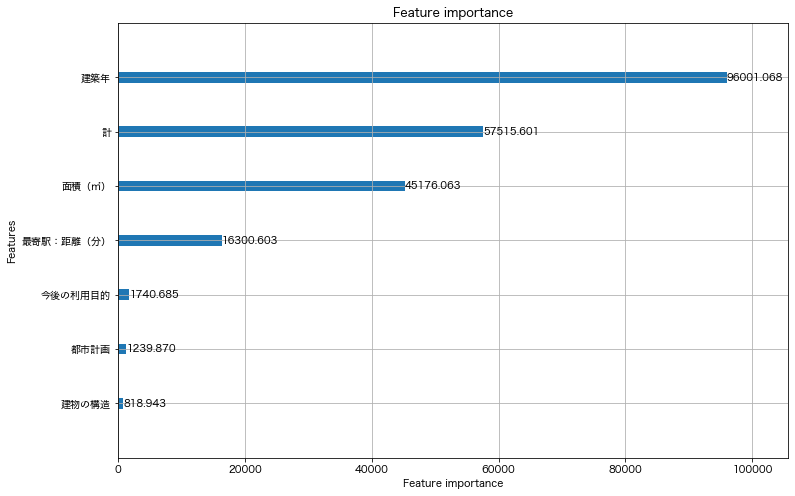

In [91]:
#各特徴量の重要度を確認
lgb.plot_importance(model, figsize=(12,8), max_num_features=50, importance_type='gain')

In [82]:
train_X.columns

Index(['最寄駅：距離（分）', '面積（㎡）', '建築年', '建物の構造', '今後の利用目的', '都市計画', '計'], dtype='object')

In [81]:
model.feature_importance()

array([ 4513,  4158,  6230,   759,   706,  1002, 12632], dtype=int32)

## テストデータ読み込み

In [ ]:
#テストデータ読み込み
test=pd.read_csv('./data/test.csv')
#人口データ読み込み
population_test=pd.read_csv('population_test.csv')
#提出用サンプルファイル読み込み
sample=pd.read_csv('./data/sample_submission.csv')

#欠損値の多いカラムを除去
#インスタンス化して訓練データを更新する
Adj_Data=Delete_Null_Data(test)
test=Adj_Data.delete_null_columns()

#人口データをカラムに追加
test['計']=population_test['計']

test.head()

In [ ]:
test.columns

## 最寄駅　距離

In [ ]:
test['最寄駅：距離（分）'].unique()

In [ ]:
#時間がわからない部分の補完、欠損値は10で補完
test['最寄駅：距離（分）']=test['最寄駅：距離（分）'].replace({'30分?60分':'45', '1H30?2H':'105', '1H?1H30':'75', '2H?':'120'})
test['最寄駅：距離（分）']=test['最寄駅：距離（分）'].fillna('10')

#文字列型から整数型に変換
test['最寄駅：距離（分）']=test['最寄駅：距離（分）'].astype(int)
test['最寄駅：距離（分）'].unique()

## 面積

In [ ]:
#面積の欠損値はなし、'2000㎡以上'は'2000'で補完
test['面積（㎡）']=test['面積（㎡）'].replace('2000㎡以上','2000')
test['面積（㎡）'].unique()
#文字列型から整数型に変換
test['面積（㎡）']=test['面積（㎡）'].astype(int)
test['面積（㎡）'].unique()

## 建築年

In [ ]:
#欠損値を補完, nanのままだとうまくいかないので文字列でnullと入れておく
test['建築年']=test['建築年'].fillna('null')

#trainデータをseireki関数の引数として渡して、結果を変数resultに格納
result=seireki(test)
print(len(result))

#resultをtrain['建築年']に格納
test['建築年']=result

In [ ]:
test['建築年'].unique()

## 建物の構造

In [ ]:
#欠損値は文字列nullで対応
test['建物の構造']=test['建物の構造'].fillna('null')

#nullは最も多いRCで補完
test['建物の構造']=='null'
test['建物の構造']=test['建物の構造'].replace('null','ＲＣ')
test['建物の構造'].unique()

#建物の構造ごとにいくつあるか集計
test.groupby(['建物の構造']).count() 

#RC:488914, SRC:208345, 鉄構造:4717の順に多い
#全体の平均：train['取引価格（総額）_log'].mean()=7.227968247625857より高いor低いの2グループに分ける
#建物の構造_new: 0=低い、1=高い
test['建物の構造']=test['建物の構造'].replace('ブロック造',0)
test['建物の構造']=test['建物の構造'].replace('木造',0)
test['建物の構造']=test['建物の構造'].replace('鉄骨造',0)
test['建物の構造']=test['建物の構造'].replace('ＲＣ、ブロック造',0)
test['建物の構造']=test['建物の構造'].replace('ＳＲＣ',0)
test['建物の構造']=test['建物の構造'].replace('ＳＲＣ、鉄骨造',0)
test['建物の構造']=test['建物の構造'].replace('ＳＲＣ、ＲＣ',0)

test['建物の構造']=test['建物の構造'].replace('軽量鉄骨造',1)
test['建物の構造']=test['建物の構造'].replace('ＲＣ',1)
test['建物の構造']=test['建物の構造'].replace('ＲＣ、木造',1)
test['建物の構造']=test['建物の構造'].replace('ＲＣ、鉄骨造',1)
test['建物の構造']=test['建物の構造'].replace('ＳＲＣ、ＲＣ、鉄骨造',1)

len(test['建物の構造'])

## 今後の利用目的

In [ ]:
#欠損値はnull、都市計画と価格の関係
test['今後の利用目的']=test['今後の利用目的'].fillna('その他')
#住宅は1,そのほかは0
test['今後の利用目的']=test['今後の利用目的'].replace('住宅',1)
test['今後の利用目的']=test['今後の利用目的'].replace({'その他':0, '事務所':0, '店舗':0})

## 都市計画

In [ ]:
#住居グループ:1と商業工業グループ:0に分ける
test['都市計画']=test['都市計画'].replace('商業地域',0)
test['都市計画']=test['都市計画'].replace('工業地域',0)
test['都市計画']=test['都市計画'].replace('工業専用地域',0)
test['都市計画']=test['都市計画'].replace('近隣商業地域',0)
test['都市計画']=test['都市計画'].replace('商業地域',0)
test['都市計画']=test['都市計画'].replace('準工業地域',0)
test['都市計画']=test['都市計画'].replace('準都市計画区域',0)

test['都市計画']=test['都市計画'].replace('市街化区域及び市街化調整区域外の都市計画区域',1)
test['都市計画']=test['都市計画'].replace('市街化調整区域',1)
test['都市計画']=test['都市計画'].replace('準住居地域',1)
test['都市計画']=test['都市計画'].replace('第１種中高層住居専用地域',1)
test['都市計画']=test['都市計画'].replace('第１種低層住居専用地域',1)
test['都市計画']=test['都市計画'].replace('第１種住居地域',1)
test['都市計画']=test['都市計画'].replace('第２種中高層住居専用地域',1)
test['都市計画']=test['都市計画'].replace('第２種低層住居専用地域',1)
test['都市計画']=test['都市計画'].replace('第２種住居地域',1)
test['都市計画']=test['都市計画'].replace('都市計画区域外',1)

test['都市計画']=test['都市計画'].fillna(1)

#train['取引価格（総額）_log'].groupby(train['都市計画']).mean()
test['都市計画'].unique()

## 人口の合計

In [ ]:
test['計']

In [ ]:
test=test[['最寄駅：距離（分）','面積（㎡）','建築年', '建物の構造', '今後の利用目的', '都市計画', '計']]
test.info()
len(test)

## モデルの実装、予測

In [ ]:
#ランダムフォレスト(submission2)
pred_r=rfr.predict(test)

#LIghtGBM(submission3)
pred_l=model.predict(test)

In [ ]:
print(len(pred_r))
pred_r

In [ ]:
print(len(pred_l))
pred_l

In [ ]:
#提出用ファイルに予測結果格納(ランダムフォレスト)
sample['取引価格（総額）_log']=pred_r
sample.to_csv('submission2.csv', index=None)


#提出用ファイルに予測結果格納(LightGBM)
sample['取引価格（総額）_log']=pred_l
sample.to_csv('submission3.csv', index=None)



In [ ]:
#LIghtGBM(submission5)
pred_l=model.predict(test)

#提出用ファイルに予測結果格納(LightGBM)
sample['取引価格（総額）_log']=pred_l
sample.to_csv('submission5.csv', index=None)

In [93]:
0.995**10, 1/1.051

(0.9511101304657719, 0.9514747859181732)

In [94]:
5*0.1056*(1-0.1056)**4

0.3378789101771686

In [98]:
(4**5)/(np.exp(4)*120)

0.1562934518505317